In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import word_tokenize, FreqDist


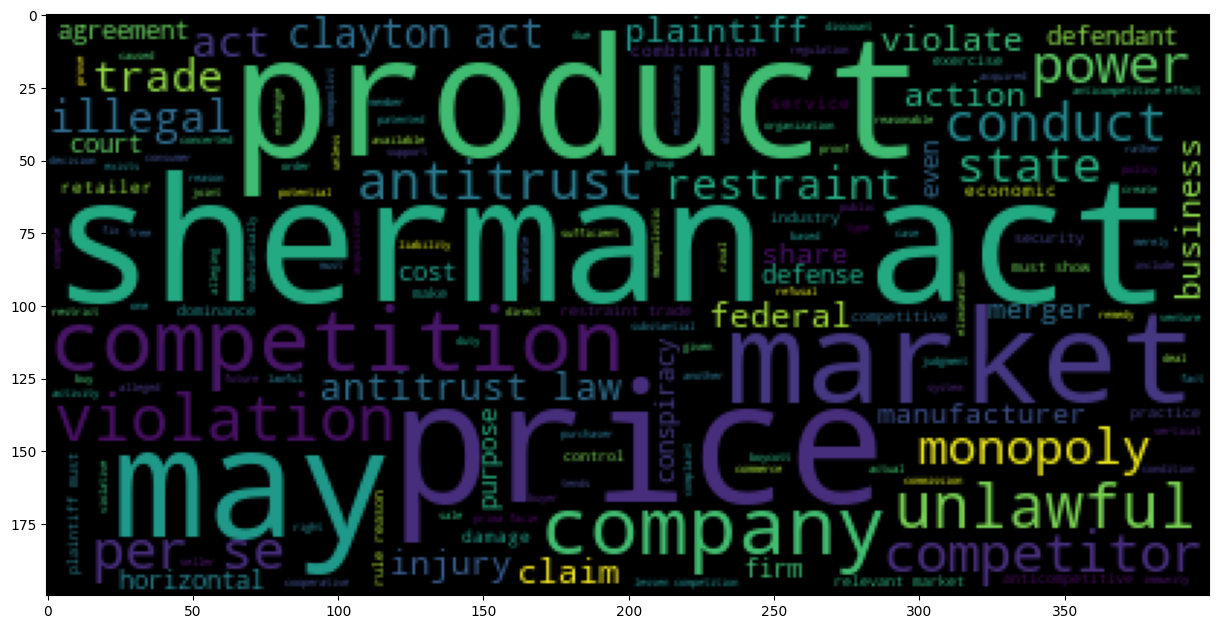

In [121]:
wordcloud = WordCloud().generate(" ".join(df.rol_preprocessed))
plt.figure(figsize=[15,8])
plt.imshow(wordcloud)

In [7]:
from gensim.models import Word2Vec

In [8]:
sentences = [word_tokenize(doc) for doc in df["rol_preprocessed"]]

In [9]:
print(sentences[:5])

[['sherman', 'act', 'prohibition', 'agreement', 'restraint', 'trade', 'limited', 'unreasonable', 'restraint'], ['combination', 'sole', 'purpose', 'regulate', 'price', 'violative', 'public', 'policy', 'sherman', 'act'], ['violation', 'sherman', 'act', 'determined', 'potential', 'harm', 'would', 'ensue', 'conspiracy', 'successful', 'actual', 'occurrence'], ['direct', 'purchaser', 'engaged', 'unlawful', 'manufacturing', 'level', 'may', 'seek', 'damage', 'antitrust', 'violation'], ['consumer', 'retail', 'good', 'service', 'standing', 'sue', 'damage', 'clayton', 'act']]


In [12]:
n_dim = 8
model = Word2Vec(sentences, vector_size=n_dim, window=5, min_count=1, sg=1) # Documentar mejor y explicar

In [20]:
model.wv.most_similar("sherman")

[('using', 0.9195469617843628),
 ('item', 0.8805657625198364),
 ('merely', 0.8490033745765686),
 ('agreement', 0.8327290415763855),
 ('compete', 0.8264014720916748),
 ('expert', 0.7800807356834412),
 ('proscribed', 0.7677908539772034),
 ('barrier', 0.7500004768371582),
 ('sold', 0.7346517443656921),
 ('law', 0.7316508293151855)]

***Topic Modeling basado en Elliot Ash***

In [106]:
# clean document
from gensim.utils import simple_preprocess
import spacy
from spacy.tokenizer import Tokenizer
from tqdm import tqdm as tq
nlp = spacy.load('en_core_web_sm')
# this is faster and we don't need the whole grammatical parse analysis

def tokenize(x, nlp):
    # lemmatize and lowercase without stopwords, punctuation and numbers
    return [w.lemma_.lower() for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit and len(w) > 2]


In [107]:
df["rol_processed"] = df.rule_of_law.apply(lambda x: tokenize(x, nlp))

In [108]:
df

,case_name,rule_of_law,rol_processed
0,United States v. Trans-Missouri Freight Assn. ...,The Sherman Act’s prohibition on agreements in...,"[sherman, act, prohibition, agreement, restrai..."
1,United States v. Addyston Pipe & Steel Co. Fed...,A combination with the sole purpose to regulat...,"[combination, sole, purpose, regulate, price, ..."
2,"Summit Health, Ltd. v. Pinhas Health care oper...",Violation of the Sherman Act is determined by ...,"[violation, sherman, act, determine, potential..."
3,Illinois Brick Co. v. Illinois Manufacturer (D...,Only direct purchasers from those engaged in u...,"[direct, purchaser, engage, unlawful, price, f..."
4,Reiter v. Sonotone Corp. Consumer (P) v. Manuf...,A consumer of retail goods and services has st...,"[consumer, retail, good, service, stand, sue, ..."
...,...,...,...
104,Fisher v. City of Berkeley Landlord (P) v. Cit...,Rent control ordinances do not conflict with f...,"[rent, control, ordinance, conflict, federal, ..."
105,California Retail Liquor Dealers Assn. v. Midc...,A state policy is immune from antitrust regula...,"[state, policy, immune, antitrust, regulation,..."
106,Hallie v. City of Eau Claire Unincorporated to...,A municipality’s anticompetitive activities ar...,"[municipality, anticompetitive, activity, prot..."
107,City of Columbia & Columbia Outdoor Advertisin...,"A city may, through regulation, give a busines...","[city, regulation, business, concern, facto, m..."


In [131]:
# randomize document order
from random import shuffle
shuffle(df['rol_preprocessed'])

# creating the term dictionary
from gensim import corpora
dictionary = corpora.Dictionary(df['rol_preprocessed'])
# filter extremes, drop all words appearing in less than 10 paragraphs and all words appearing in at least every third paragraph
# dictionary.filter_extremes(no_below=10, no_above=0.33, keep_n=1000)
print (len(dictionary))


# creating the document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['rol_preprocessed']]

# train LDA with 10 topics and print
from gensim.models.ldamodel import LdaModel
lda = LdaModel(doc_term_matrix, num_topics=10, 
               id2word = dictionary, passes=3)
lda.show_topics(formatted=True)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

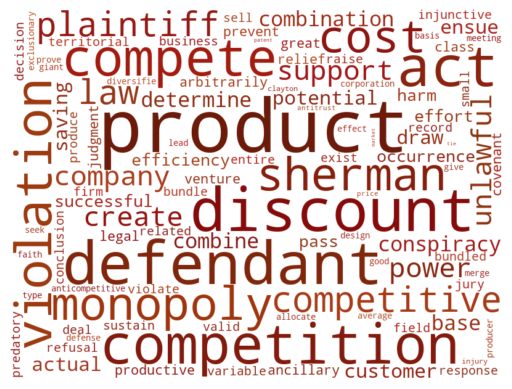

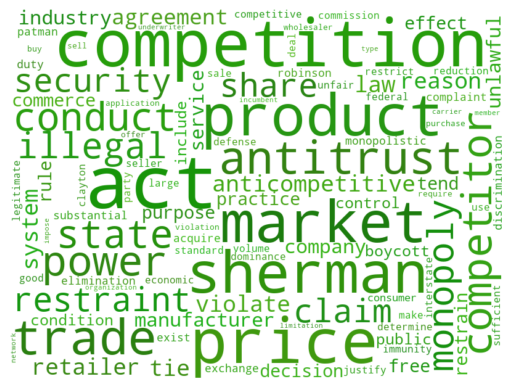

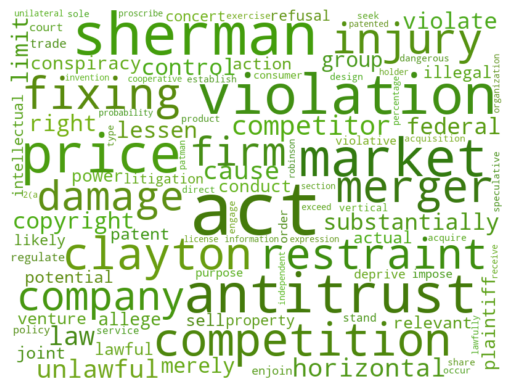

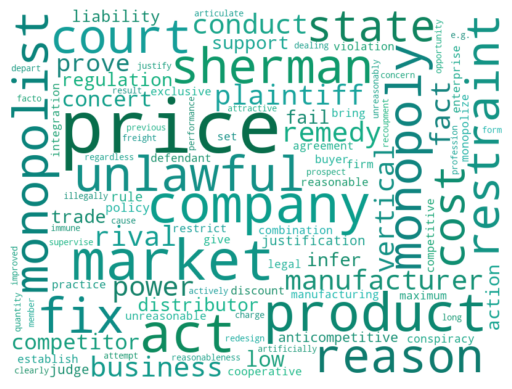

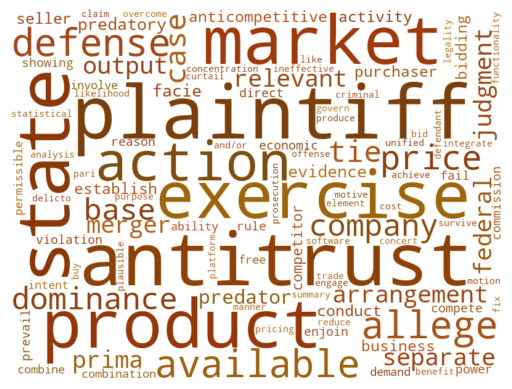

In [114]:
###
# LDA Word Clouds
###

from numpy.random import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# make directory if not exists
from os import mkdir
try:
    mkdir('lda')
except:
    pass

# make word clouds for the topics
for i,weights in lda.show_topics(num_topics=-1,
                                 num_words=100,
                                 formatted=False):
    
    #logweights = [w[0], np.log(w[1]) for w in weights]
    maincol = randint(0,360)
    def colorfunc(word=None, font_size=None, 
                  position=None, orientation=None, 
                  font_path=None, random_state=None):   
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)   

    
    wordcloud = WordCloud(background_color="white", 
                          ranks_only=False, 
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

    plt.clf()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [24]:
observacion = df['rule_of_law'].iloc[16]    
observacion  

'Merely alleging that information dissemination has the potential to cause price regulation does not establish a Sherman Act violation. '